# Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: Data Preparation

Prepare the dataset before further analysis and modeling. This step ensures that the dataset is well-structured.

- Inspect missing values, duplicate records, invalid and inconsistencies, and handle them if any.
- Split the dataset into features (X) and target variable (y), where the target is "Is Fraudulent" (1 for fraudulent, 0 for legitimate).
- Split the dataset into training, validation, and testing data:
  - Training data: 60% of the original data
  - Validation data: 20% of the original data
  - Testing data: 20% of the original data

## Inspecting the data

In [2]:
df = pd.read_csv('./data/fraud_ecom_transaction_data.csv')
df = df.drop('Transaction ID', axis=1)
print('Shape:', df.shape)
df.head()

Shape: (23634, 9)


,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,PayPal,electronics,1,40,desktop,0,282,23
1,301.34,credit card,electronics,3,35,tablet,0,223,0
2,340.32,debit card,toys & games,5,29,desktop,0,360,8
3,95.77,credit card,electronics,5,45,mobile,0,325,20
4,77.45,credit card,clothing,5,42,desktop,0,116,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction Amount  23634 non-null  float64
 1   Payment Method      23634 non-null  object 
 2   Product Category    23634 non-null  object 
 3   Quantity            23634 non-null  int64  
 4   Customer Age        23634 non-null  int64  
 5   Device Used         23634 non-null  object 
 6   Is Fraudulent       23634 non-null  int64  
 7   Account Age Days    23634 non-null  int64  
 8   Transaction Hour    23634 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

Transaction Amount    0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Device Used           0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [5]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [6]:
(df['Customer Age'] <= 0).sum()

9

**Conclusion**: The data has 23634 rows, 8 predictors, 1 respond variable ("Is Fraudulent"). Of the predictors, 3 are categorical ("Payment Method", "Product Categor", and "Device Used"), while the rest are numerical. There are no missing values. However, there are invalid values in "Customer Age" column where some customers have non-positive age.

I will drop the rows with invalid age.

I will also transform "Transaction Amount" using log because that column is very skewed.

In [7]:
df_clean = df[df['Customer Age'] > 0].copy()
df_clean['Transaction Amount'] = np.log(df_clean['Transaction Amount'])

## Train/valid/test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train, df_non_train = train_test_split(df_clean, train_size=0.6, random_state=99)
df_valid, df_test = train_test_split(df_non_train, train_size=0.5, random_state=123)

print('train:', df_train.shape)
print('valid:', df_valid.shape)
print('test:', df_test.shape)

train: (14175, 9)
valid: (4725, 9)
test: (4725, 9)


## X/y split

In [10]:
def split_Xy(df: pd.DataFrame, target_col: str) -> tuple[pd.DataFrame, pd.Series]:
    X = df.drop(target_col, axis=1).copy()
    y = df[target_col].copy()
    return (X, y)

In [11]:
target_col = 'Is Fraudulent'
X_train, y_train = split_Xy(df_train, target_col)
X_valid, y_valid = split_Xy(df_valid, target_col)
X_test, y_test = split_Xy(df_test, target_col)

# Question 2: Exploratory Data Analysis (EDA)

Perform Exploratory Data Analysis to understand data better. Identify patterns, correlations, and potential outliers that could indicate fraudulent behavior.

- Use at least four visualizations, including both histograms and boxplots, to identify patterns and compare feature distributions between fraud and non-fraud cases.
- Analyze the relationships between features using correlation.
- Provide at least four key insights from the EDA that could help identify fraudulent transactions quickly.



In [12]:
num_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
cat_cols = ['Payment Method', 'Product Category', 'Device Used']

## Numerical predictors

In [13]:
def create_subplots_grid(n_vars: int, ncols: int):
    nrows = int(np.ceil(n_vars / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    axes = axes.flatten()
    axes_used = axes[:n_vars]
    for ax in axes[n_vars:]:
        ax.set_axis_off()
    return (fig, axes_used)

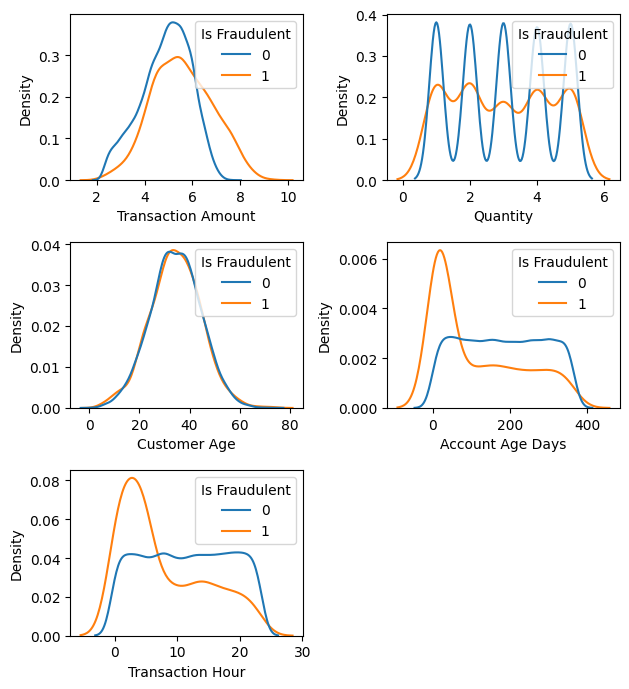

In [14]:
fig, axes = create_subplots_grid(len(num_cols), ncols=2)
fig.set_figheight(7)
for ax,col in zip(axes, num_cols):
    sns.kdeplot(df_train, x=col, hue=target_col, ax=ax, common_norm=False)
plt.tight_layout()

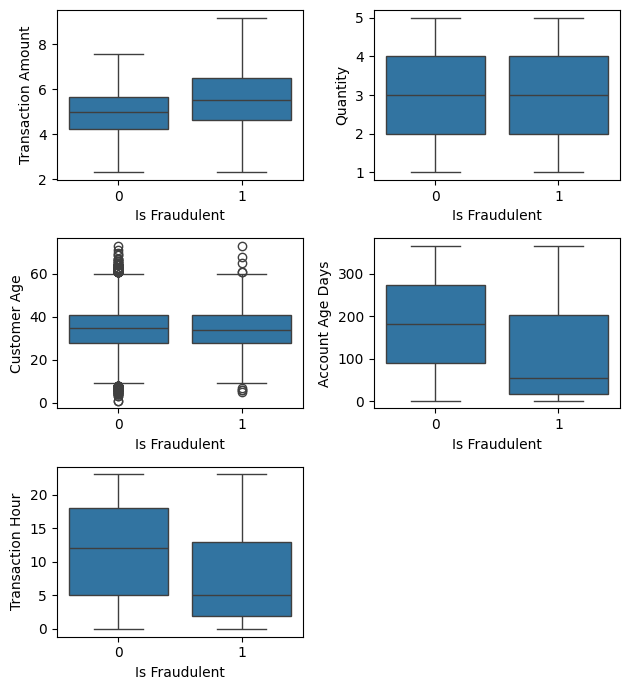

In [15]:
fig, axes = create_subplots_grid(len(num_cols), ncols=2)
fig.set_figheight(7)
for ax,col in zip(axes, num_cols):
    sns.boxplot(df_train, x='Is Fraudulent', y=col, ax=ax)
plt.tight_layout()

Observation: fraudulent transactions are more likely to have lower "Transaction Hour" and "Account Age Days", but higher "Transaction Amount". Other variables don't appear to be helpful.

## Categorical variables

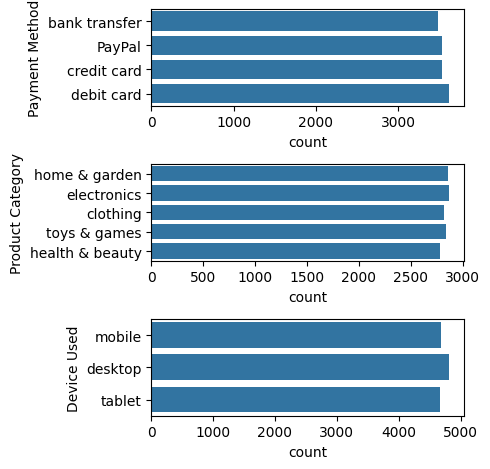

In [16]:
fig, axes = create_subplots_grid(len(cat_cols), ncols=1)
fig.set_figwidth(5)
for ax,col in zip(axes, cat_cols):
    sns.countplot(df_train, y=col, ax=ax)
plt.tight_layout()

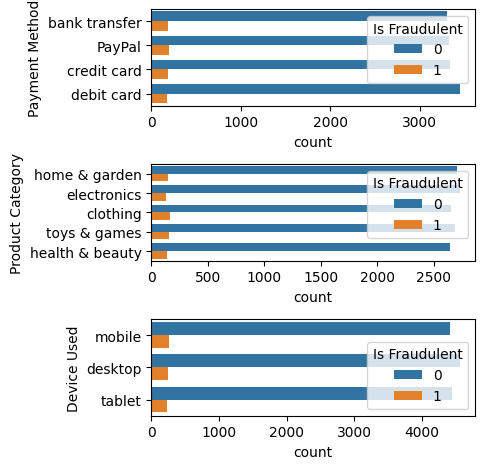

In [17]:
fig, axes = create_subplots_grid(len(cat_cols), ncols=1)
fig.set_figwidth(5)
for ax,col in zip(axes, cat_cols):
    sns.countplot(df_train, y=col, hue='Is Fraudulent', ax=ax)
plt.tight_layout()

Observation: there seems to be no relationship between the categorical variables and the response variable.

## Conclusions

- Fraudulent transactions are more likely to have lower "Transaction Hour"
- Fraudulent transactions are more likely to have lower "Account Age Days"
- Fraudulent transactions are more likely to have higher "Transaction Amount"
- Other variables don't appear to be helpful

# Question 3: Weight of Evidence (WOE) Transformation

Weight of Evidence (WOE) is a technique used to transform categorical variables into numerical values based on their relationship with the likelihood of fraud.

- Create a categorical variable from a numerical variable using the binning method.
- Compute WOE values for each category in that variable using the WOE formula.
- Label the strength of information using IV (Information Value) with three categories: [strong, weak, very low].
- Based on this result, suggest which variables can be used to detect fraudulent cases.


In [18]:
from IPython.display import display, Markdown

df_train_bin = df_train.copy()
for var in num_cols:
    df_train_bin[var + '_bin'] = pd.qcut(df_train_bin[var], q=4, duplicates='drop')
    df_train_bin = df_train_bin.drop(var, axis=1)

crosstabs = {}
for var in df_train_bin.columns:
    if var == target_col:
        continue
    crosstabs[var] = pd.crosstab(df_train_bin[var], df_train_bin[target_col], margins=True)

WOEs = {}
IVs = {}

for var,crosstab in crosstabs.items():
    # Calculate % Good
    crosstab['p_good'] = crosstab[0]/crosstab[0]['All']

    # Calculate % Bad
    crosstab['p_bad'] = crosstab[1]/crosstab[1]['All']

    # Calculate the WOE
    crosstab['WOE'] = np.log(crosstab['p_good']/(crosstab['p_bad'] + 1e-6) + 1e6)  # add 1e-6 to prevent 0 division and log
    
    # Calculate the contribution value for IV
    crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']
    
    # Calculate the IV
    IV = crosstab['contribution'][:-1].sum()
    WOEs[var] = crosstab
    IVs[var] = IV

    display(crosstab)

Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Payment Method,,,,,,,
PayPal,3330,202,3532,0.247989,0.270415,13.815511,-0.309823
bank transfer,3309,182,3491,0.246425,0.243641,13.815512,0.038464
credit card,3342,192,3534,0.248883,0.257028,13.815512,-0.112530
debit card,3447,171,3618,0.256702,0.228916,13.815512,0.383888
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Product Category,,,,,,,
clothing,2655,168,2823,0.197721,0.224900,13.815511,-0.375484
electronics,2732,134,2866,0.203455,0.179384,13.815512,0.332557
health & beauty,2646,139,2785,0.197051,0.186078,13.815512,0.151602
home & garden,2707,151,2858,0.201594,0.202142,13.815512,-0.007574
toys & games,2688,155,2843,0.200179,0.207497,13.815512,-0.101101
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Device Used,,,,,,,
desktop,4563,248,4811,0.339812,0.331995,13.815512,0.108005
mobile,4424,266,4690,0.329461,0.356091,13.815511,-0.367910
tablet,4441,233,4674,0.330727,0.311914,13.815512,0.259905
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Transaction Amount_bin,,,,,,,
"(2.302, 4.235]",3443,101,3544,0.256405,0.135207,13.815512,1.674399
"(4.235, 5.019]",3384,160,3544,0.252011,0.214190,13.815512,0.522511
"(5.019, 5.691]",3385,158,3543,0.252085,0.211513,13.815512,0.560530
"(5.691, 9.182]",3216,328,3544,0.239500,0.439090,13.815511,-2.757440
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Quantity_bin,,,,,,,
"(0.999, 2.0]",5396,319,5715,0.401847,0.427041,13.815511,-0.348076
"(2.0, 3.0]",2704,126,2830,0.201370,0.168675,13.815512,0.451706
"(3.0, 4.0]",2634,148,2782,0.196157,0.198126,13.815512,-0.027197
"(4.0, 5.0]",2694,154,2848,0.200626,0.206158,13.815512,-0.076433
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Customer Age_bin,,,,,,,
"(0.999, 28.0]",3670,197,3867,0.273310,0.263722,13.815512,0.132462
"(28.0, 35.0]",3544,206,3750,0.263926,0.275770,13.815512,-0.163626
"(35.0, 41.0]",2935,164,3099,0.218573,0.219545,13.815512,-0.013425
"(41.0, 73.0]",3279,180,3459,0.244191,0.240964,13.815512,0.044588
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Account Age Days_bin,,,,,,,
"(0.999, 83.0]",3157,414,3571,0.235106,0.554217,13.815511,-4.408683
"(83.0, 176.0]",3413,115,3528,0.254170,0.153949,13.815512,1.384608
"(176.0, 272.0]",3446,109,3555,0.256628,0.145917,13.815512,1.529528
"(272.0, 365.0]",3412,109,3521,0.254096,0.145917,13.815512,1.494547
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


Is Fraudulent,0,1,All,p_good,p_bad,WOE,contribution
Transaction Hour_bin,,,,,,,
"(-0.001, 5.0]",3359,413,3772,0.250149,0.552878,13.815511,-4.182359
"(5.0, 11.0]",3294,115,3409,0.245308,0.153949,13.815512,1.262174
"(11.0, 17.0]",3358,122,3480,0.250074,0.163320,13.815512,1.198558
"(17.0, 23.0]",3417,97,3514,0.254468,0.129853,13.815513,1.721627
All,13428,747,14175,1.000000,1.000000,13.815512,0.000000


In [19]:
IV_series = pd.Series(IVs).sort_values()
IV_series

Customer Age_bin          9.047570e-10
Device Used               3.310242e-09
Payment Method            5.522544e-09
Product Category          7.421116e-09
Quantity_bin              7.991956e-09
Transaction Amount_bin    2.138216e-07
Transaction Hour_bin      3.856450e-07
Account Age Days_bin      4.131807e-07
dtype: float64

In [20]:
pd.cut(IV_series, bins=[0, 0.02, 0.1, np.inf], labels=['very low', 'weak', 'strong'])

Customer Age_bin          very low
Device Used               very low
Payment Method            very low
Product Category          very low
Quantity_bin              very low
Transaction Amount_bin    very low
Transaction Hour_bin      very low
Account Age Days_bin      very low
dtype: category
Categories (3, object): ['very low' < 'weak' < 'strong']

Based on the above, all variables have weak relationship with the response variable. However, judging by the IV values, the 3 variables with the strongest relationship are "Account Age Days", "Transaction Hour", and "Transaction Amount", which we have also discovered before in the EDA section.

# One-Hot Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

def fit_ohe(df: pd.DataFrame, cat_cols: list[str]) -> OneHotEncoder:
    '''
    Fit one-hot encoder for the categorical columns

    Parameters
    ----------
    df: pd.DataFrame
    cat_cols: list of str
        Name of categorical columns

    Returns
    -------
    OneHotEncoder object
    '''
    ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
    ohe.fit(df[cat_cols])
    return ohe

def transform_ohe(df: pd.DataFrame, ohe: OneHotEncoder) -> pd.DataFrame:
    '''
    Transform the categorical columns using one-hot encoder

    Parameters
    ----------
    df: pd.DataFrame
    ohe: fitted OneHotEncoder object

    Returns
    -------
    pd.DataFrame
    '''
    cat_cols = ohe.feature_names_in_
    df = df.copy()
    df_ohe = pd.DataFrame(
        ohe.transform(df[cat_cols]),
        index=df.index,
        columns=ohe.get_feature_names_out()
    )
    df = pd.concat([df, df_ohe], axis=1)
    df = df.drop(cat_cols, axis=1)
    return df


In [22]:
from sklearn.preprocessing import StandardScaler

def fit_scaler(df: pd.DataFrame) -> StandardScaler:
    '''
    Fit a standard scaler on all columns

    Parameters
    ----------
    df: pd.DataFrame

    Returns
    -------
    StandardScaler object
    '''
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler

def transform_scaler(df: pd.DataFrame, scaler: StandardScaler) -> pd.DataFrame:
    '''
    Transform data using a standard scaler

    Parameters
    ----------
    df: pd.DataFrame
    scaler: fitted StandardScaler object

    Returns
    -------
    pd.DataFrame
    '''
    return pd.DataFrame(
        scaler.transform(df),
        index=df.index,
        columns=df.columns
    )

In [23]:
ohe = fit_ohe(X_train, cat_cols)
X_train_ohe = transform_ohe(X_train, ohe)
X_valid_ohe = transform_ohe(X_valid, ohe)
X_test_ohe = transform_ohe(X_test, ohe)

In [24]:
scaler = fit_scaler(X_train_ohe)
X_train_scale = transform_scaler(X_train_ohe, scaler)
X_valid_scale = transform_scaler(X_valid_ohe, scaler)
X_test_scale = transform_scaler(X_test_ohe, scaler)

# Question 4: Simple and Interpretable Machine Learning Model

Use a simple and interpretable machine learning model.

- Build a machine learning model using three predictors that have the highest information value.
- Use a model that is easy to interpret, e.g., a logistic regression model.
- Interpret the model and explain how the model predicts fraudulent transactions.


In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

def eval_model(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    return {
        'roc_auc': roc_auc_score(y, y_prob),
        'accuracy': accuracy_score(y, y_pred),
        'f1': f1_score(y, y_pred)
    }

In [26]:
chosen_vars = ['Account Age Days', 'Transaction Hour', 'Transaction Amount']
X_train_sub = X_train_scale[chosen_vars]
X_valid_sub = X_valid_scale[chosen_vars]
X_test_sub = X_test_scale[chosen_vars]

In [27]:
dummy = DummyClassifier()
dummy.fit(X_train_sub, y_train)
eval_model(dummy, X_valid_sub, y_valid)

{'roc_auc': 0.5, 'accuracy': 0.9528042328042328, 'f1': 0.0}

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train_sub, y_train)

eval_model(logreg, X_valid_sub, y_valid)

{'roc_auc': 0.7344727704478129,
 'accuracy': 0.9534391534391534,
 'f1': 0.02654867256637168}

In [29]:
pd.Series(logreg.coef_[0], index=chosen_vars)

Account Age Days     -0.677248
Transaction Hour     -0.565660
Transaction Amount    0.701455
dtype: float64

From the coefficients, we can infer that:

- Lower Account Age Days and Transaction Hour has higher likelihood of being a fraud
- Higher transaction amount has higher likelihood of being a fraud

Meanwhile, the variable with the highest impact to fraud likelihood is Transaction Amount, since its absolute coefficient is the highest. The coefficient of Transaction Amount is 0.70. Here's the interpretation: for every 1 standard deviation increase in (log of) Transaction Amount, the odd of a transaction being a fraud increased by exp(0.70) = 2.02 times. (Remember that we have normalized the predictors, which is why the coefficient need to be interpreted as a change in 1 unit of standard deviation.)

# Question 5: Alternative Machine Learning Models

Build and evaluate two alternative machine learning models that may offer better performance.

- Consider building two other machine learning models, e.g., Decision Tree, Support Vector Machine, etc.
- Perform hyperparameter tuning to obtain the best parameters for each model, including Logistic Regression and the two other models.
- Evaluate the models using appropriate evaluation metrics.
- Recommend the best model based on the evaluation on testing data.

In [31]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
from datetime import datetime

def fit_eval_cv(
    cv_obj: GridSearchCV,
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_test: pd.DataFrame,
    y_test: pd.Series
):
    '''
    Fit and evaluate the given cv model.
    Will print out the train/test scores.
    Returns dictionary containing:
    - training_score
    - test_score
    - best_model
    - best_params
    '''
    start_time = datetime.now()
    cv_obj.fit(X_train, y_train)
    elapsed = datetime.now() - start_time
    print(f'Elapsed: {elapsed}')

    train_score = cv_obj.score(X_train, y_train)
    test_score = cv_obj.score(X_test, y_test)
    best_params = cv_obj.best_params_

    print(f'Train score: {train_score:.4f}')
    print(f'Valid score: {test_score:.4f}')
    print(f'Best Params: {best_params}')
    return {
        'train_score': train_score,
        'test_score': test_score,
        'best_model': cv_obj.best_estimator_,
        'best_params': best_params,
    }

In [33]:
gs_config = dict(
    cv = 10,
    scoring = 'roc_auc',
)
gs_input = dict(
    X_train = X_train_sub,
    y_train = y_train,
    X_test = X_valid_sub,
    y_test = y_valid,
)
gs_results = {}

In [34]:
gs_results['LogisticRegression'] = fit_eval_cv(
    GridSearchCV(
        estimator = LogisticRegression(solver='liblinear', random_state=42, class_weight=None),
        param_grid = {
            'penalty': ['l1', 'l2'],
            'C': np.logspace(-5, 5, 10),
        },
        **gs_config,
    ),
    **gs_input
)

Elapsed: 0:00:05.322482
Train score: 0.7688
Valid score: 0.7353
Best Params: {'C': 1e-05, 'penalty': 'l2'}


In [35]:
gs_results['SVC'] = fit_eval_cv(
    GridSearchCV(
        estimator = SVC(random_state=42),
        param_grid = {},
        **gs_config,
    ),
    **gs_input
)

Elapsed: 0:00:43.512175
Train score: 0.6621
Valid score: 0.6192
Best Params: {}


In [36]:
gs_results['RandomForest'] = fit_eval_cv(
    RandomizedSearchCV(
        estimator = RandomForestClassifier(random_state=42, n_estimators=250),
        param_distributions = {
            'max_depth': [2, 5, 10, 30, None],
            'min_samples_split': [2, 3, 4, 5, 10, 25, 50],
            'min_samples_leaf': [2, 3, 4, 5, 10, 20],
        },
        random_state = 0,
        n_iter = 40,
        **gs_config,
    ),
    **gs_input
)

Elapsed: 0:20:12.916117
Train score: 0.8465
Valid score: 0.8095
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 20, 'max_depth': 5}


In [37]:
gs_summary = pd.DataFrame(gs_results).T
gs_summary = gs_summary.sort_values('test_score', ascending=False)
gs_summary

,train_score,test_score,best_model,best_params
RandomForest,0.846487,0.809454,"(DecisionTreeClassifier(max_depth=5, max_featu...","{'min_samples_split': 5, 'min_samples_leaf': 2..."
LogisticRegression,0.768769,0.735257,"LogisticRegression(C=1e-05, random_state=42, s...","{'C': 1e-05, 'penalty': 'l2'}"
SVC,0.662112,0.619178,SVC(random_state=42),{}


Conclusion: The RandomForest model achieve the highest ROC AUC score equal to 0.8095 out of sample. Meanwhile, the logistic regression ROC AUC score is only 0.73. However, one drawback of RandomForest is its complexity and the long time it takes to be trained.

# Question 6: Threshold Selection for Fraud Classification

When building a logistic regression model, the output is a probability of a transaction being fraudulent. The challenge often lies in choosing a threshold probability that classifies predictions as either fraud (1) or legitimate (0).

- Using the logistic regression model from the previous question, evaluate different threshold probabilities to predict fraud.
- Explain how the threshold affects the model's classification of fraud and legitimate transactions, particularly in relation to the associated costs:
  - **False negatives cost:** Fraud loss, represented by the total amount of money exchanged in transactions for ignored fraud cases.
  - **False positives cost:** Losses from profit (5% of the total amount of money) and customer acquisition costs ($15 per customer).
- Recommend the best threshold if the company prioritizes ensuring all fraud cases are caught.


In [38]:
def calc_cost(y_true: np.array, y_pred: np.array, trx_amount: np.array) -> tuple[float, float, float]:
    is_fn = (y_pred == 0) & (y_true == 1)
    is_fp = (y_pred == 1) & (y_true == 0)
    fn_cost = sum(is_fn * trx_amount)
    fp_cost = sum(is_fp * (15 + 0.05 * trx_amount))
    total_cost = fn_cost + fp_cost
    return (fn_cost, fp_cost, total_cost)

In [39]:
from sklearn.metrics import roc_curve

In [40]:
logreg2 = gs_results['LogisticRegression']['best_model']

In [41]:
y_valid_prob = logreg2.predict_proba(X_valid_sub)[:, 1]
thresholds = np.linspace(min(y_valid_prob), max(y_valid_prob), 100)
thresholds = np.append(thresholds, float('inf'))

costs = []
fp_costs = []
fn_costs = []
fpr = []
tpr = []

for threshold in thresholds:
    y_valid_pred = (y_valid_prob >= threshold).astype(int)
    is_fn = (y_valid_pred == 0) & (y_valid == 1)
    is_fp = (y_valid_pred == 1) & (y_valid == 0)
    fn = sum(is_fn)
    fp = sum(is_fp)
    tp = sum((y_valid_pred == 1) & (y_valid == 1))
    tn = sum((y_valid_pred == 0) & (y_valid == 0))
    fn_cost, fp_cost, total_cost = calc_cost(y_valid, y_valid_pred, np.exp(df_valid['Transaction Amount']))
    # fn_cost = sum(is_fn * np.exp(df_valid['Transaction Amount']))
    # fp_cost = sum(is_fp * (15 + 0.05 * np.exp(df_valid['Transaction Amount'])))
    # print(threshold, accuracy_score(y_valid, y_valid_pred))
    fn_costs.append(fn_cost)
    fp_costs.append(fp_cost)
    costs.append(total_cost)
    fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)

best_threshold = thresholds[np.argmin(costs)]
print('Best threshold:', best_threshold)

Best threshold: 0.48740988310604894


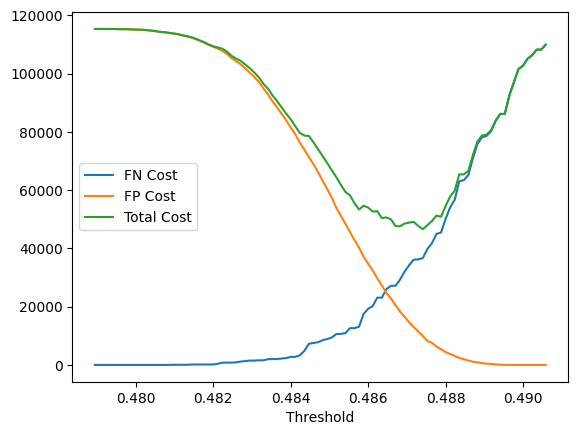

In [42]:
plt.plot(thresholds, fn_costs, label='FN Cost')
plt.plot(thresholds, fp_costs, label='FP Cost')
plt.plot(thresholds, costs, label='Total Cost')
plt.xlabel('Threshold')
plt.legend()

The plot above depicts how the costs change as we change the threshold. From my calculation, the lowest cost is achieved with threshold equal to 0.4874.

# Question 7: Cost Evaluation of the Model

Evaluate the total cost that the model incurs in the testing data when using the best threshold from Question 6.

- Make predictions on testing data and summarize the evaluation using appropriate performance metrics.
- Calculate the cost impact of the model:
  - **Cost of fraudulent cases:** Total amount of money exchanged in the transaction.
  - **Average cost to acquire a new user:** $15 per customer.
  - **Average loss of potential profit:** 5% of the total amount of money exchanged per transaction.
- Create a summary table of the evaluation. Assess whether the model with the best threshold outperforms the total cost of all wrong predictions.


In [43]:
y_test_prob = logreg2.predict_proba(X_test_sub)[:, 1]
y_test_pred = (y_test_prob >= best_threshold).astype(int)
y_test_neg = np.zeros_like(y_test_pred)

test_summary = pd.DataFrame({
    'model': calc_cost(y_test, y_test_pred, np.exp(df_test['Transaction Amount'])),
    'baseline': calc_cost(y_test, y_test_neg, np.exp(df_test['Transaction Amount']))
}, index=['FN Cost', 'FP Cost', 'Total Cost'])
test_summary

,model,baseline
FN Cost,50756.910,148542.6
FP Cost,9193.228,0.0
Total Cost,59950.138,148542.6


From the table above, we can see that the model with the best threshold has \\$59,950 total cost. Meanwhile, the baseline (predicting negative on all observations) lead to cost \\$148,542, which is significantly higher. In other words, the model works pretty well.

# Question 8: Return on Investment (ROI) Calculation

Fraud detection models might minimize fraud losses. However, building a model incurs additional costs such as model ownership and fraud handling costs. To assess the benefit of models, we can calculate the Return on Investment (ROI).

```
ROI = Total Utility / (Total Cost of Ownership + Total Cost of Fraud Handling)
```

- Calculate the ROI of the best model from Question 5 using the following details:
  - **Total Utility** is the net return, which is the difference between the benefits (True Positives and True Negatives) and the costs (False Negatives and False Positives):
    - **False Negatives (FN):** Fraud loss, represented by the total amount of money exchanged in transactions for ignored fraud cases.
    - **False Positives (FP):** Losses from profit and customer acquisition costs.
    - **True Positives (TP):** Prevented fraud losses, represented by the total amount of money exchanged in transactions.
    - **True Negatives (TN):** Generated profit from legitimate transactions.
  - **Total Cost of Ownership:**
    - Acquisition costs: \$30,000 (software, hardware, security, development)
    - Operation costs: \$20,000 (migration, setup, monitoring, support)
  - **Total Cost of Fraud Handling:**
    - Fraud inspection per transaction predicted as fraud: \$200
    - Fraud handling cost per truly fraudulent transaction: \$300
    - Legal cost: \$500



In [44]:
def calc_total_utility(y_true: pd.Series, y_pred: pd.Series, trx_amount: pd.Series) -> float:
    tp = (y_true == 1) & (y_pred == 1)
    tn = (y_true == 0) & (y_pred == 0)

    fn_cost, fp_cost, _ = calc_cost(y_true, y_pred, trx_amount)
    cost = fp_cost + fn_cost

    tp_benefit = (tp * trx_amount).sum()
    tn_benefit = (tn * trx_amount * 0.05).sum()

    total_benefit = tp_benefit + tn_benefit

    total_utility = total_benefit - cost

    return total_utility

def calc_roi(y_true: pd.Series, y_pred: pd.Series, trx_amount: pd.Series):
    total_utility = calc_total_utility(y_true, y_pred, trx_amount)
    tco = 30e3 + 20e3 # acquisition + operation costs

    legal_cost = 500
    # calculate fraud handling cost for every transactin we predict as frauds
    fraud_handling_cost = 200
    tp = (y_pred == 1) & (y_true == 1)
    total_fraud_handling_cost = (y_pred * fraud_handling_cost).sum()

    # there's a $100 additional cost for true positives
    total_fraud_handling_cost += (tp * 100).sum()

    roi = total_utility / (tco + total_fraud_handling_cost + legal_cost)

    return roi

In [45]:
roi = calc_roi(y_test, y_test_pred, np.exp(df_test['Transaction Amount']))

print('ROI:', roi)

ROI: 0.6322731200317964


As you can see, the ROI of implementing this model is about 63%, which is quite high.